# Notes 
-Leaf 0 is leaf 10. 

-Pictures should be cropped to 125 cm lenght. 


In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

#import skimage modules
from skimage.io import imread
from skimage.measure import find_contours, label, regionprops, regionprops_table
from skimage.morphology import area_opening, disk, binary_closing
from skimage.color import label2rgb, rgb2gray

#not have zero warning
import warnings
warnings.filterwarnings("ignore", message= "divide by zero encountered in true_divide")
warnings.filterwarnings("ignore", message= "invalid value encountered in true_divide")

(1148, 706, 4)


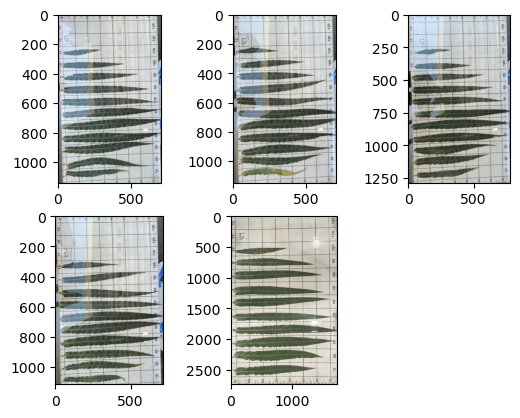

In [123]:


file_list = glob.glob("../Agron845_project/Images/*.*")



pic_list = []
for file in file_list:
    RGB = imread(file)
    pic_list.append(RGB)

#RGB = imread('../Agron845_project/*.jpg')
#plt.imshow(RGB)
#RGB.shape

print(pic_list[1].shape)

plt.figure()
for images in range(len(pic_list)):
    plt.subplot(2,3,images+1)
    plt.imshow(pic_list[images])

In [124]:
len(pic_list)

5

done
Image contains 10 leaves
done
Image contains 12 leaves
done
Image contains 10 leaves
done
Image contains 9 leaves
done
Image contains 10 leaves


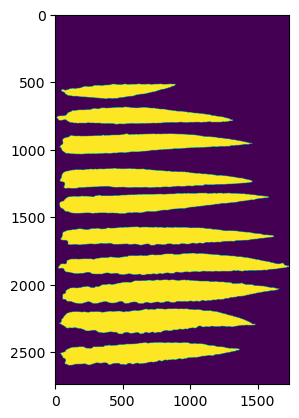

In [186]:
#1 = 10, 2 = 11, 3 = 11, 4=10, 5=10
data = []

for RGB in pic_list:
    props = 
    BW = 0
    red = RGB[:, :, 0]
    green = RGB[:, :, 1]
    blue = RGB[:, :, 2]
    red_green_ratio = red/green
    blue_green_ratio = blue/green
    ExG = 2*green - red - blue
    BW = np.logical_and(red_green_ratio<0.99, blue_green_ratio<0.99)
    print("done")
    BW = area_opening(BW, 2000)
    BW = binary_closing(BW, disk(15))
    label_image = label(BW)
    contours = find_contours(BW, 0)
    plt.imshow(BW)
    print(f"Image contains {len(contours)} leaves")
    props = regionprops_table(label_image, properties = ('area',
                                                   'axis_minor_length',
                                                   'axis_major_length',
                                                   'image'))
    data.append(props)
    
df = pd.DataFrame(data)

plt.imshow(BW)

In [185]:
df.iloc[1][1]

array([ 25.60554013, 136.69414692,  41.68132092,  49.52021525,
        50.77785524,  53.75177635, 463.82796538])

In [172]:
df.iloc[3][3]

array([array([[False, False, False, ...,  True,  True, False],
              [False, False, False, ...,  True,  True,  True],
              [False, False, False, ...,  True,  True,  True],
              ...,
              [False, False,  True, ..., False, False, False],
              [False, False,  True, ..., False, False, False],
              [False, False,  True, ..., False, False, False]]),
       array([[False, False, False, ..., False, False, False],
              [False, False, False, ..., False, False, False],
              [False, False,  True, ..., False, False, False],
              ...,
              [False, False,  True, ..., False, False, False],
              [False, False,  True, ..., False, False, False],
              [False, False, False, ..., False, False, False]]),
       array([[False, False, False, ..., False, False, False],
              [False, False, False, ..., False, False, False],
              [False, False, False, ..., False, False, False],
             

In [85]:
# GEt bands

for RGB in pic_list:
    red = RGB[:, :, 0] 
    green = RGB[:, :, 1]
    blue = RGB[:, :, 2]
red = RGB[:, :, 0] #Extract matrix of red pixel values (m by n matrix)
green = RGB[:, :, 1] #Extract matrix of green pixel values
blue = RGB[:, :, 2]

red_green_ratio = red/green

# Calculate blue to green ratio for each pixel. The result is an m x n array.
blue_green_ratio = blue/green

# Excess green
ExG = 2*green - red - blue

# Classification of green pixels
BW = np.logical_and(red_green_ratio<0.99, blue_green_ratio<0.99, ExG>20) 



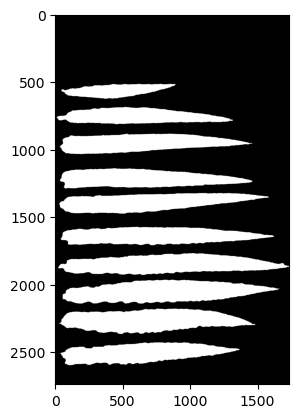

In [86]:
# Closing (performs a dilation followed by an erosion. Connect small bright patches)
BW = area_opening(BW, 1500)

BW = binary_closing(BW, disk(15))

plt.imshow(BW, cmap="gray" )

In [88]:
# Identify seed boundaries

label_image = label(BW >0.1)
contours = find_contours(BW, 0)



# Print number of seeds in image
print('Image contains',len(contours),'leaves')


Image contains 10 leaves


In [90]:
# Plot leaf contours
#plt.figure(figsize=(6,6))
#plt.imshow(BW, cmap='gray')
#plt.axis('off')
#plt.tight_layout()

#for contour in contours:
#    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=2)
    

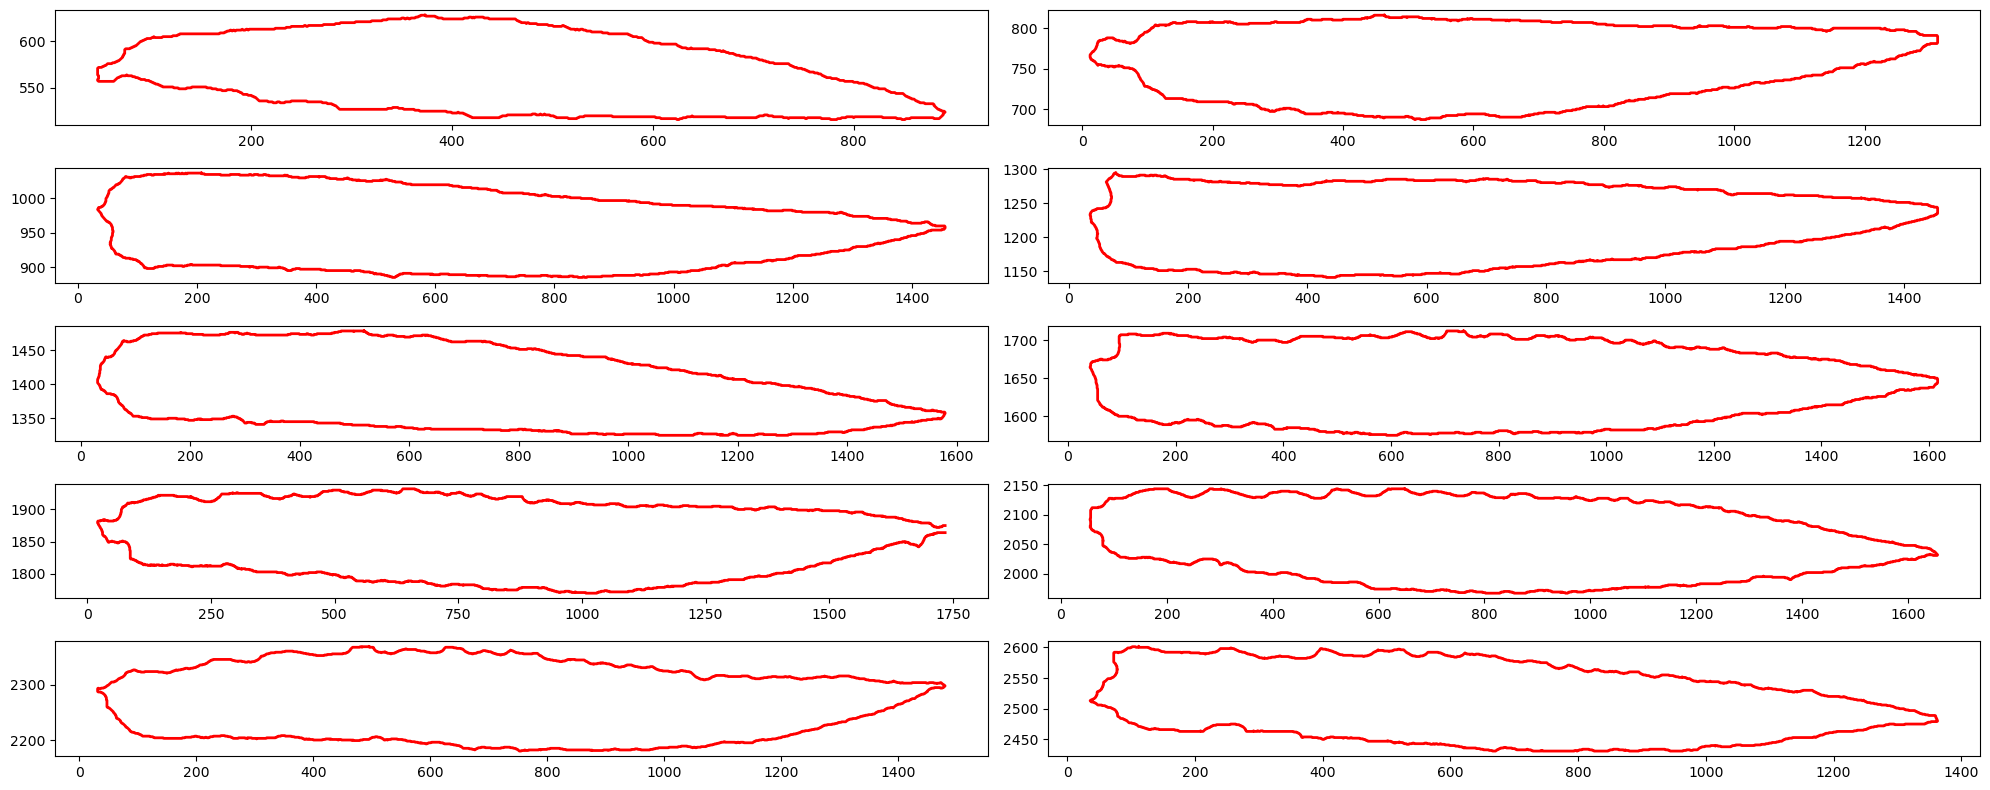

In [73]:
plt.figure(figsize=(20, 8))
for leave in range(10):
    plt.subplot(5,2,leave+1)
    plt.plot(contours[leave][:, 1], contours[leave][:, 0], '-r', linewidth=2)
    plt.tight_layout()
plt.show()

In [74]:
label_image = label(BW)
#image_label_overlay = label2rgb(label_image, image = RGB, bg_label = 0)

In [75]:
props = regionprops_table(label_image, properties = ('area',
                                                   'axis_minor_length',
                                                   'axis_major_length',
                                                   'image'))

df = pd.DataFrame(props)
df.head()



,area,axis_minor_length,axis_major_length,image
0,58282,96.986919,792.419890,"[[False, False, False, False, False, False, Fa..."
1,111672,118.872170,1252.120750,"[[False, False, False, False, False, False, Fa..."
2,144015,137.325863,1410.917893,"[[False, False, False, False, False, False, Fa..."
3,148702,139.576456,1430.499551,"[[False, False, False, False, False, False, Fa..."
4,153895,133.490129,1534.182207,"[[False, False, False, False, False, False, Fa..."


In [49]:
#from pixels to centimiters (125 is the lenght of the picture)
centimiter = 125/BW.shape[0]
centimiter


0.04562043795620438

In [62]:
df_cm = df.iloc[:, 0:3]*centimiter
df_cm['image'] = df['image']

In [153]:
df_cm.iloc[2][3]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])